In [1]:
import pandas as pd
import json
import pickle
from tqdm import tqdm
from pathlib import Path
import matplotlib 

In [2]:
p = Path('concat_text')
file_list = list(p.glob('*.txt'))
file_list

[PosixPath('concat_text/The Doctor Who Transcripts - The Battle of Demons Run -\r\nTwo Days Later.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - The Masque of Mandragora.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - The Smugglers.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - Day of the Daleks.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - The Christmas Invasion.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - Time and the Rani.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - The Ice Warriors.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - Doctor Who and The Silurians.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - Extremis.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - The Robots of Death.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - Hide.txt'),
 PosixPath('concat_text/The Doctor Who Transcripts - The Creature from the Pit.txt'),
 PosixPath('concat_text/The Doc

In [3]:
sentences = []
is_saying = False
for path in tqdm(file_list):
    with open(path,'r',encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            # 如果到了文本最后，就可以直接翻篇了
            if line[:2] == '[<' or line == '---':
                break
            # 这些不属于对白，可以直接跳过
            if line[:3] == '**[' or line[0] == '(':
                continue
                
            who_said = line.split(':')
            if len(who_said) > 1 and who_said[0][:3].isupper():
                is_saying = True
                sentences.append(who_said[1])
            elif is_saying:
                sentences.append(line)

100%|██████████| 301/301 [00:00<00:00, 425.31it/s]


In [4]:
len(sentences)

239851

In [5]:
sentences[:10]

[' Strax. Strax. Strax. Strax.',
 ' Warning. Evacuating.',
 ' Leave me.',
 ' Warning. Evacuating.',
 ' Go on. You must leave me here to die.',
 " You're not dying, Strax.",
 " It's fine. Don't worry. It's a glorious thing for a Sontaran to die in battle.",
 " The battle was two days ago. You've made a full recovery.",
 " No, I haven't.",
 " We've healed your wounds. You're completely fine."]

In [6]:
from nltk.tokenize import sent_tokenize
def sentence_token_nltk(str):
    sent_tokenize_list = sent_tokenize(str)
    return sent_tokenize_list

In [7]:
new = []
for s in tqdm(sentences):
    new.extend(sentence_token_nltk(s))

100%|██████████| 239851/239851 [00:14<00:00, 16712.01it/s]


In [8]:
import nltk

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/fangwenda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
len(new)

410115

In [11]:
length = list(map(lambda x:len(x.split(' ')),new))

In [12]:
data = pd.Series(length)

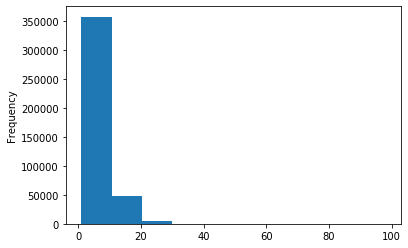

In [14]:
data.plot(kind='hist')

In [21]:
# 找出doctor说过的话
doctors = []
doctor_saying = False
for path in tqdm(file_list):
    with open(path,'r',encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            # 如果到了文本最后，就可以直接翻篇了
            if line[:2] == '[<' or line == '---':
                break
            # 这些不属于对白，可以直接跳过
            if line[:3] == '**[' or line[0] == '(':
                continue
                
            who_said = line.split(':')
            if len(who_said) > 1:
                if who_said[0] == 'DOCTOR':
                    doctor_saying = True
                    doctors.append(who_said[1].strip())
                else:
                    doctor_saying = False           
            elif doctor_saying:
                doctors.append(line)

100%|██████████| 301/301 [00:00<00:00, 603.81it/s]


In [23]:
len(doctors)

57469

In [24]:
dw_s = []
for s in tqdm(doctors):
    dw_s.extend(sentence_token_nltk(s))

100%|██████████| 57469/57469 [00:04<00:00, 14172.36it/s]


In [25]:
len(dw_s)

108646

In [27]:
dw_s[:20]

['The Tardis, where else?',
 "I'll give you a guided tour someday.",
 'Boot cupboard.',
 'Not very interesting.',
 "Oh, I've seen bigger boot cupboards.",
 "Well, how big's big?",
 'Relative dimensions, you see.',
 'No constant.',
 'How big are you at the moment?',
 'Listen, listen.',
 'There are no measurements in infinity.',
 'You humans have got such limited little minds.',
 "I don't know why I like you so much.",
 "That's true, that's very true.",
 'What?',
 'Yes, yes, it is good.',
 'Do you know, this is the second control room.',
 'You know, I could run the Tardis just as easily from here as I could from the old one.',
 'Come to think of it, this was the old one.',
 'Yes, it is.']

In [ ]:
# 格式化剧本
"""
**[Area 29]** 表示地点信息 需要保留
(The Doctor leaves. Korwin's hands twitch.) 表示动作信息，忽略
FRANCINE [OC] 在可视画面范围外发生的动作或对白，对于训练用处不大，忽略掉[OC]
人物基本信息
"""